In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
df = pd.read_csv('dataset.csv')
df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout


In [3]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [4]:
# Preprocesamiento de la variable 'Target' para que sea binaria
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

In [5]:
# Separar las variables de entrada (X) y la de salida (y)
X = df.drop('Target', axis=1)
y = df['Target']

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# IMPORTANTE: Definir las columnas manualmente
# Estas son las columnas que son CATEGORÍAS, aunque tengan números
categorical_features = ['Marital status', 'Application mode', 'Application order', 'Course',
                        'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
                        "Mother's qualification", "Father's qualification", "Mother's occupation",
                        "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
                        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Estas son las columnas que son NÚMEROS REALES (cantidades)
numerical_features = ['Age at enrollment', 'Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                      'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                      'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

In [8]:
# Crear un preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
print("Preprocesador creado para estandarizar y codificar las variables.")

Preprocesador creado para estandarizar y codificar las variables.



Entrenando Regresión Logística...

--- Evaluación del modelo: Regresión Logística ---


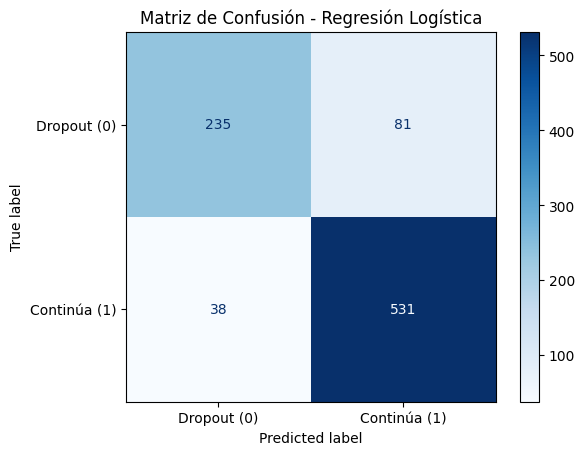

Reporte de Clasificación:
              precision    recall  f1-score   support

 Dropout (0)       0.86      0.74      0.80       316
Continúa (1)       0.87      0.93      0.90       569

    accuracy                           0.87       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.87      0.87      0.86       885



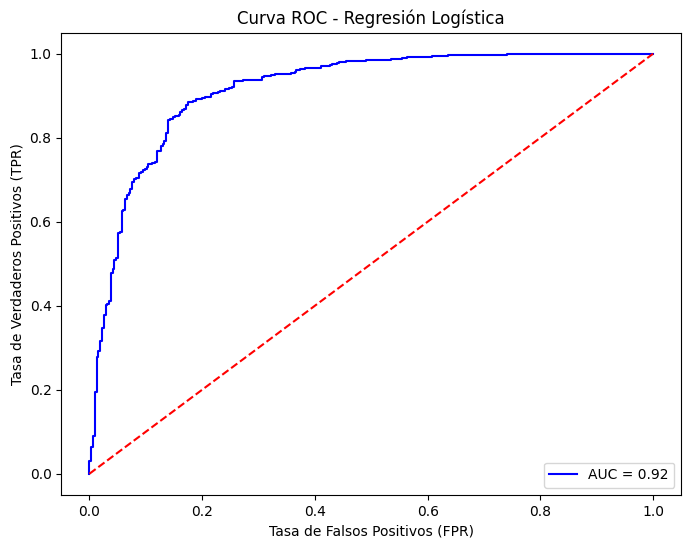


Entrenando Árbol de Decisión...

--- Evaluación del modelo: Árbol de Decisión ---


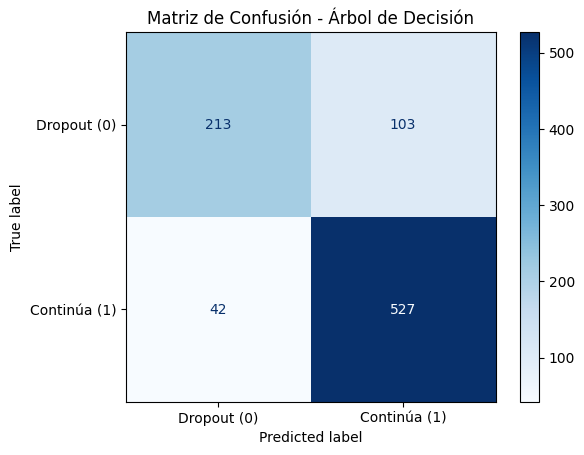

Reporte de Clasificación:
              precision    recall  f1-score   support

 Dropout (0)       0.84      0.67      0.75       316
Continúa (1)       0.84      0.93      0.88       569

    accuracy                           0.84       885
   macro avg       0.84      0.80      0.81       885
weighted avg       0.84      0.84      0.83       885



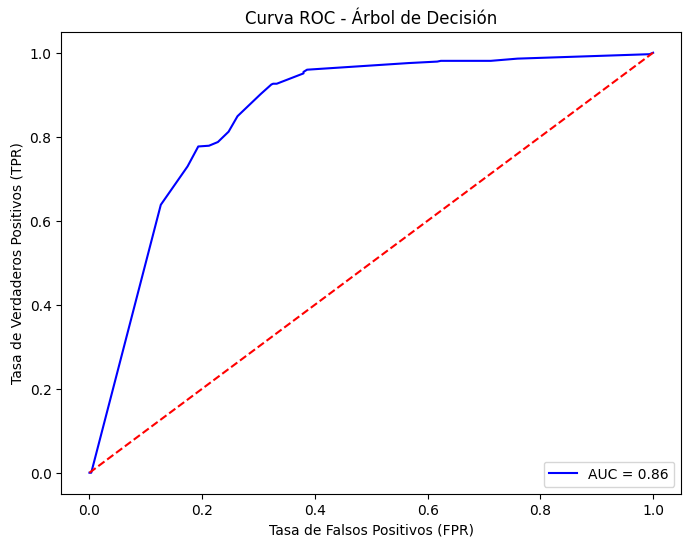


Entrenando KNN...

--- Evaluación del modelo: K-Nearest-Neighbor (KNN) ---


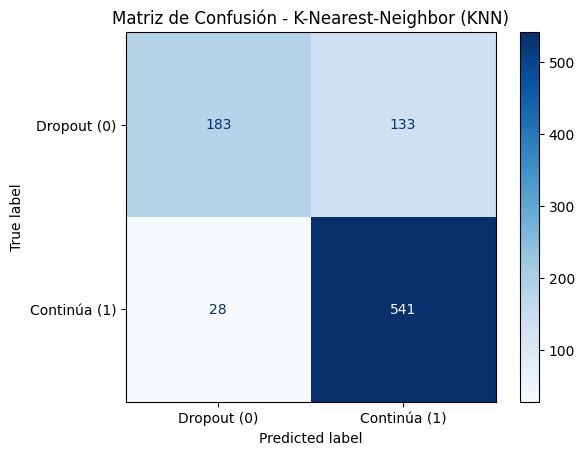

Reporte de Clasificación:
              precision    recall  f1-score   support

 Dropout (0)       0.87      0.58      0.69       316
Continúa (1)       0.80      0.95      0.87       569

    accuracy                           0.82       885
   macro avg       0.83      0.76      0.78       885
weighted avg       0.83      0.82      0.81       885



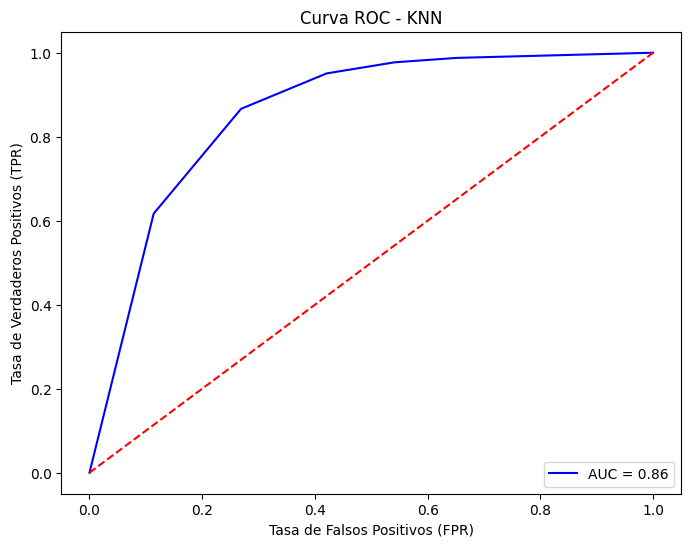


Entrenando SVM...

--- Evaluación del modelo: Support Vector Machine (SVM) ---


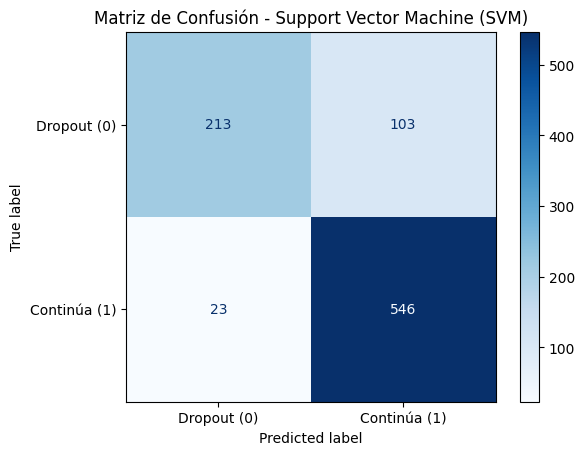

Reporte de Clasificación:
              precision    recall  f1-score   support

 Dropout (0)       0.90      0.67      0.77       316
Continúa (1)       0.84      0.96      0.90       569

    accuracy                           0.86       885
   macro avg       0.87      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885



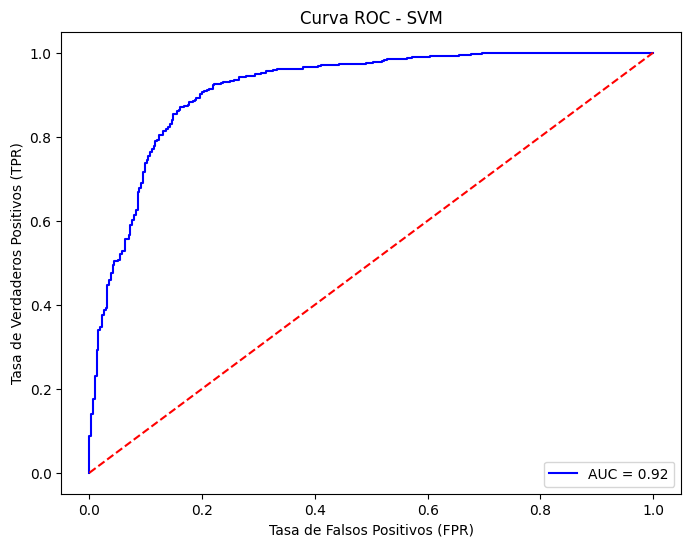

0.9152466018553537

In [9]:

# --- Paso 3: Entrenamiento y Evaluación de Modelos ---
# Función para evaluar y mostrar resultados del modelo
def evaluar_modelo(y_test, y_pred, model_name):
    print(f"\n--- Evaluación del modelo: {model_name} ---")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dropout (0)", "Continúa (1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    # Reporte de Clasificación con métricas clave
    reporte = classification_report(y_test, y_pred,target_names=['Dropout (0)', 'Continúa (1)'])
    print("Reporte de Clasificación:")
    print(reporte)
    return accuracy_score(y_test, y_pred)

def plot_roc_curve(model, X_test, y_test, model_name):
    # Obtiene las probabilidades de predicción
    try:
        probs = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # Si el modelo no tiene predict_proba (como algunos SVM), se maneja el error
        print(f"Advertencia: El modelo {model_name} no tiene predict_proba. No se puede graficar la curva ROC.")
        return

    # Calcula la curva ROC y el AUC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Grafica la curva
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'Curva ROC - {model_name}')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

# --- Modelo 1: Regresión Logística ---
print("\nEntrenando Regresión Logística...")
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
pipeline_lr.fit(X_train, y_train)
preds_lr = pipeline_lr.predict(X_test)
accuracy_lr = evaluar_modelo(y_test, preds_lr, "Regresión Logística")

# Gráfica de la curva ROC para Regresión Logística
plot_roc_curve(pipeline_lr, X_test, y_test, 'Regresión Logística')

# --- Modelo 2: Árbol de Decisión ---
print("\nEntrenando Árbol de Decisión...")
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Añade max_depth aquí para evitar el sobreajuste
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])
pipeline_dt.fit(X_train, y_train)
preds_dt = pipeline_dt.predict(X_test)
accuracy_dt = evaluar_modelo(y_test, preds_dt, "Árbol de Decisión")

# Gráfica de la curva ROC para Árbol de Decisión
plot_roc_curve(pipeline_dt, X_test, y_test, 'Árbol de Decisión')


# --- Modelo 3: K-Nearest-Neighbor (KNN) ---
print("\nEntrenando KNN...")
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
preds_knn = pipeline_knn.predict(X_test)
accuracy_knn = evaluar_modelo(y_test, preds_knn, "K-Nearest-Neighbor (KNN)")

# Gráfica de la curva ROC para KNN
plot_roc_curve(pipeline_knn, X_test, y_test, 'KNN')

# --- Modelo 4: Support Vector Machine (SVM) ---
print("\nEntrenando SVM...")
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42,probability=True))
])
pipeline_svm.fit(X_train, y_train)
preds_svm = pipeline_svm.predict(X_test)
accuracy_svm = evaluar_modelo(y_test, preds_svm, "Support Vector Machine (SVM)")

# Gráfica de la curva ROC para Support Vector Machine (SVM)
plot_roc_curve(pipeline_svm, X_test, y_test, 'SVM')




--- Comparación de Curvas ROC de los Modelos ---


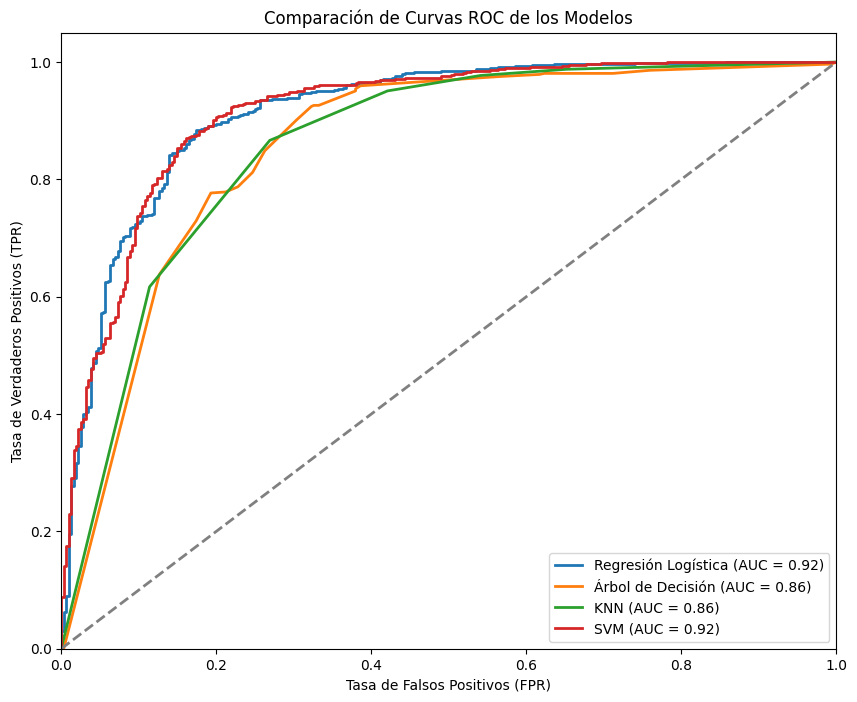

In [10]:
# --- Paso 4: Comparación de Curvas ROC ---
print("\n--- Comparación de Curvas ROC de los Modelos ---")
plt.figure(figsize=(10, 8))

# Se crea un diccionario con los pipelines entrenados para facilitar la iteración
models_dict = {
    'Regresión Logística': pipeline_lr,
    'Árbol de Decisión': pipeline_dt,
    'KNN': pipeline_knn,
    'SVM': pipeline_svm
}

for name, model in models_dict.items():
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC de los Modelos')
plt.legend(loc='lower right')
plt.show()

In [11]:
# 1️⃣ Función para obtener métricas personalizadas
def obtener_metricas(y_test, y_pred):
    # Forzamos etiquetas [0,1] para que siempre sea 2x2
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    # Sensibilidad para Dropout (0): tn / (tn + fp) - capacidad de detectar deserción
    sensibilidad_dropout = tn / (tn + fp) if (tn + fp) != 0 else 0
    # Especificidad para Continúa (1): tp / (tp + fn) - capacidad de detectar continuidad
    especificidad_continua = tp / (tp + fn) if (tp + fn) != 0 else 0

    return accuracy, sensibilidad_dropout, especificidad_continua

# 2️⃣ Diccionario con tus modelos entrenados
models_dict = {
    'Regresión Logística': pipeline_lr,
    'Árbol de Decisión': pipeline_dt,
    'KNN': pipeline_knn,
    'SVM': pipeline_svm
}

# 3️⃣ Bucle para obtener métricas y guardarlas en un DataFrame
resultados_metricas = []

for nombre, modelo in models_dict.items():
    y_pred = modelo.predict(X_test)
    accuracy, sensibilidad_dropout, especificidad_continua = obtener_metricas(y_test, y_pred)

    resultados_metricas.append({
        'Modelo': nombre,
        'Accuracy': round(accuracy, 4),
        'Sensibilidad (Dropout)': round(sensibilidad_dropout, 4),
        'Especificidad (Continúa)': round(especificidad_continua, 4)
    })

df_resultados = pd.DataFrame(resultados_metricas)

print("\n=== Comparación de Modelos ===")
print(df_resultados)


=== Comparación de Modelos ===
                Modelo  Accuracy  Sensibilidad (Dropout)  \
0  Regresión Logística    0.8655                  0.7437   
1    Árbol de Decisión    0.8362                  0.6741   
2                  KNN    0.8181                  0.5791   
3                  SVM    0.8576                  0.6741   

   Especificidad (Continúa)  
0                    0.9332  
1                    0.9262  
2                    0.9508  
3                    0.9596  



=== IMPLEMENTANDO K-MEANS CLUSTERING ===
Silhouette Score: 0.2279
Calinski-Harabasz Index: 616.9824
Pureza en entrenamiento: 0.8127
Pureza en prueba: 0.8147

=== ANÁLISIS DE CENTROIDES (VARIABLES CUELLO DE BOTELLA) ===
Top 10 variables que más diferencian los clusters:
1. Curricular units 1st sem (credited): diferencia = 0.3580
2. Age at enrollment: diferencia = 0.4358
3. Curricular units 1st sem (enrolled): diferencia = 0.9723
4. Curricular units 2nd sem (enrolled): diferencia = 1.0423
5. Curricular units 1st sem (evaluations): diferencia = 1.0846
6. Curricular units 2nd sem (evaluations): diferencia = 1.3360
7. Curricular units 1st sem (approved): diferencia = 1.7429
8. Curricular units 2nd sem (approved): diferencia = 1.8158
9. Curricular units 1st sem (grade): diferencia = 2.1873
10. Curricular units 2nd sem (grade): diferencia = 2.3018

=== EVALUACIÓN DE K-MEANS COMO CLASIFICADOR ===
Accuracy K-means: 0.7740


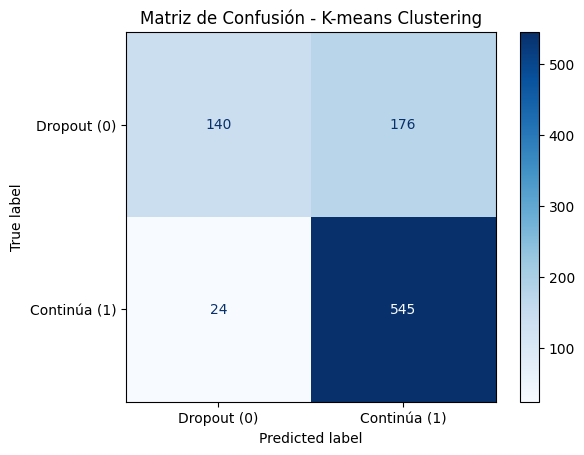

K-means clustering implementado exitosamente!


In [12]:
# --- Paso 5: Aprendizaje No Supervisado - K-means Clustering (Paper 3) - VERSIÓN CORREGIDA ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

print("\n=== IMPLEMENTANDO K-MEANS CLUSTERING ===")

# Aplicar el preprocesador a los datos de entrenamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# K-means con k=2 clusters (dropout vs continúa)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels_train = kmeans.fit_predict(X_train_preprocessed)
kmeans_labels_test = kmeans.predict(X_test_preprocessed)

# Métricas de calidad del clustering
silhouette_train = silhouette_score(X_train_preprocessed, kmeans_labels_train)
# CORRECCIÓN: Convertir matriz dispersa a densa para calinski_harabasz_score
X_train_dense = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
calinski_train = calinski_harabasz_score(X_train_dense, kmeans_labels_train)

print(f"Silhouette Score: {silhouette_train:.4f}")
print(f"Calinski-Harabasz Index: {calinski_train:.4f}")

# Función para calcular pureza (qué tan bien coinciden los clusters con las etiquetas reales)
def calcular_pureza(y_true, y_pred):
    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    # Calcular pureza: suma de máximos por fila / total
    pureza = np.sum(np.max(cm, axis=1)) / np.sum(cm)
    return pureza

# Calcular pureza en entrenamiento y prueba
pureza_train = calcular_pureza(y_train, kmeans_labels_train)
pureza_test = calcular_pureza(y_test, kmeans_labels_test)

print(f"Pureza en entrenamiento: {pureza_train:.4f}")
print(f"Pureza en prueba: {pureza_test:.4f}")

# Analizar centroides para identificar "variables cuello de botella"
print("\n=== ANÁLISIS DE CENTROIDES (VARIABLES CUELLO DE BOTELLA) ===")
centroides = kmeans.cluster_centers_

# Obtener nombres de features después del preprocesamiento
feature_names = []
# Features numéricas (ya están estandarizadas)
feature_names.extend(numerical_features)
# Features categóricas (one-hot encoded)
for cat_feature in categorical_features:
    # Simulamos los nombres de las categorías one-hot
    unique_vals = df[cat_feature].nunique()
    for i in range(unique_vals):
        feature_names.append(f"{cat_feature}_{i}")

# Calcular diferencias entre centroides
diferencias = np.abs(centroides[0] - centroides[1])
top_features_idx = np.argsort(diferencias)[-10:]  # Top 10 diferencias

print("Top 10 variables que más diferencian los clusters:")
for i, idx in enumerate(top_features_idx):
    if idx < len(feature_names):
        print(f"{i+1}. {feature_names[idx]}: diferencia = {diferencias[idx]:.4f}")

# Evaluar K-means como clasificador
print("\n=== EVALUACIÓN DE K-MEANS COMO CLASIFICADOR ===")
# Mapear clusters a etiquetas (asumiendo que cluster 0 = dropout, cluster 1 = continúa)
# Esto es una aproximación ya que K-means no tiene etiquetas
cluster_to_label = {}
for cluster in [0, 1]:
    mask = kmeans_labels_test == cluster
    if np.sum(mask) > 0:
        # Asignar la etiqueta más común en ese cluster
        cluster_to_label[cluster] = y_test[mask].mode()[0]

kmeans_predictions = np.array([cluster_to_label[label] for label in kmeans_labels_test])

# Calcular métricas
accuracy_kmeans = accuracy_score(y_test, kmeans_predictions)
print(f"Accuracy K-means: {accuracy_kmeans:.4f}")

# Mostrar matriz de confusión
cm_kmeans = confusion_matrix(y_test, kmeans_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=["Dropout (0)", "Continúa (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - K-means Clustering')
plt.show()



print("K-means clustering implementado exitosamente!")

In [14]:
# Preparar datos para TensorFlow
print("Preparando datos para Deep Learning...")

# Aplicar el preprocesador a los datos
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

# Convertir a arrays densos si son sparse
if hasattr(X_train_tf, 'toarray'):
    X_train_tf = X_train_tf.toarray()
    X_test_tf = X_test_tf.toarray()

print(f"Forma de X_train_tf: {X_train_tf.shape}")
print(f"Forma de X_test_tf: {X_test_tf.shape}")

Preparando datos para Deep Learning...
Forma de X_train_tf: (3539, 254)
Forma de X_test_tf: (885, 254)


In [15]:
# Función para crear el modelo de Deep Learning
def crear_modelo_deep_learning(input_dim):
    """
    Crea un modelo de red neuronal profunda para clasificación binaria
    """
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

print("Función crear_modelo_deep_learning definida correctamente")

Función crear_modelo_deep_learning definida correctamente



=== ENTRENANDO MODELO DEEP LEARNING (5 EJECUCIONES) ===

--- EJECUCIÓN 1/5 ---


c:\Users\ricar\OneDrive\Escritorio\PROYECTOS\ML\TF RICARDO\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy: 0.8588
   Recall 0: 0.7627
   F1-Score: 0.8925

--- EJECUCIÓN 2/5 ---


c:\Users\ricar\OneDrive\Escritorio\PROYECTOS\ML\TF RICARDO\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy: 0.8610
   Recall 0: 0.7057
   F1-Score: 0.8976

--- EJECUCIÓN 3/5 ---


c:\Users\ricar\OneDrive\Escritorio\PROYECTOS\ML\TF RICARDO\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy: 0.8655
   Recall 0: 0.7532
   F1-Score: 0.8987

--- EJECUCIÓN 4/5 ---


c:\Users\ricar\OneDrive\Escritorio\PROYECTOS\ML\TF RICARDO\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy: 0.8610
   Recall 0: 0.7057
   F1-Score: 0.8976

--- EJECUCIÓN 5/5 ---


c:\Users\ricar\OneDrive\Escritorio\PROYECTOS\ML\TF RICARDO\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Accuracy: 0.8576
   Recall 0: 0.7120
   F1-Score: 0.8945

=== RESULTADOS PROMEDIO DNN (5 EJECUCIONES) ===
Accuracy promedio: 0.8608
Precision promedio: 0.8610
Recall 1 promedio: 0.9346
Recall 0 promedio: 0.7278
F1-Score promedio: 0.8962


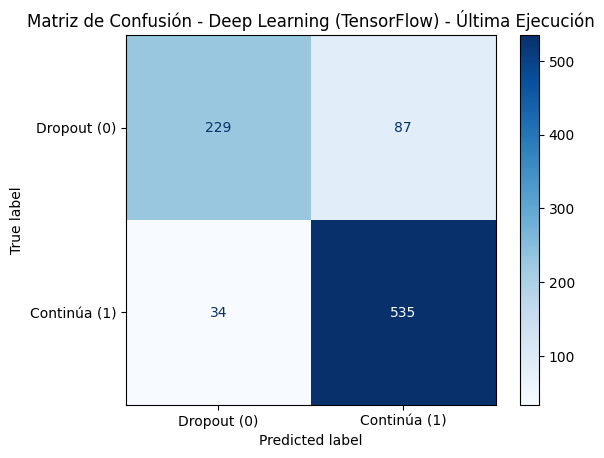

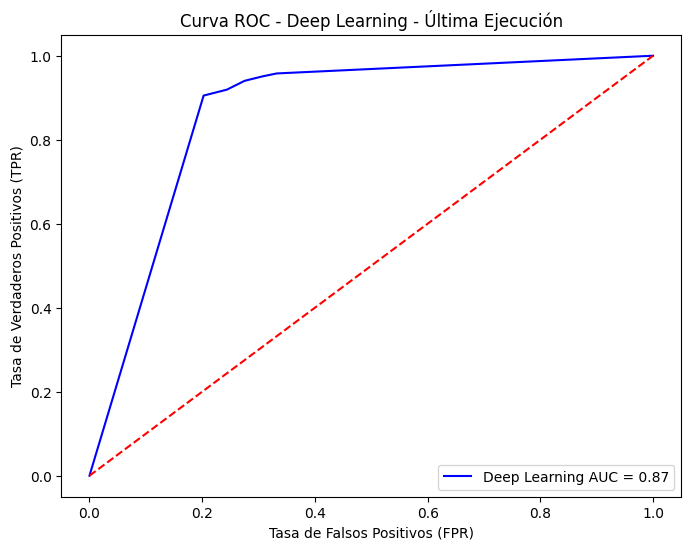

Deep Learning implementado exitosamente con promedio de 5 ejecuciones!

=== RESULTADOS PROMEDIO DNN (5 EJECUCIONES) ===


In [26]:
# Entrenar el modelo 5 veces y calcular promedio
print("\n=== ENTRENANDO MODELO DEEP LEARNING (5 EJECUCIONES) ===")
# Importaciones adicionales para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import numpy as np

# Lista para guardar resultados
resultados_dnn = []

for ejecucion in range(5):
    print(f"\n--- EJECUCIÓN {ejecucion + 1}/5 ---")
    
    # Crear nuevo modelo para cada ejecución
    model_ejecucion = crear_modelo_deep_learning(X_train_tf.shape[1])
    model_ejecucion.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    # Entrenar modelo
    history_ejecucion = model_ejecucion.fit(
        X_train_tf, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0,
        # QUITAR ESTA PARTE:
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
        ]
        
    )
    
    # Hacer predicciones
    y_pred_proba_ejecucion = model_ejecucion.predict(X_test_tf, verbose=0)
    y_pred_ejecucion = (y_pred_proba_ejecucion > 0.5).astype(int).flatten()
    
    # Calcular métricas
    accuracy_ejecucion = accuracy_score(y_test, y_pred_ejecucion)
    precision_ejecucion = precision_score(y_test, y_pred_ejecucion)
    recall_ejecucion = recall_score(y_test, y_pred_ejecucion)
    f1_ejecucion = f1_score(y_test, y_pred_ejecucion)
    
    # Calcular Recall 0
    cm_ejecucion = confusion_matrix(y_test, y_pred_ejecucion)
    tn, fp, fn, tp = cm_ejecucion.ravel()
    recall_0_ejecucion = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Guardar resultados
    # Guardar resultados
    resultados_dnn.append({
        'accuracy': accuracy_ejecucion,
        'precision': precision_ejecucion,
        'recall_1': recall_ejecucion,
        'recall_0': recall_0_ejecucion,
        'f1_score': f1_ejecucion,
        'predicciones': y_pred_ejecucion,  # ← AÑADIR ESTA LÍNEA
        'probabilidades': y_pred_proba_ejecucion.flatten()  # ← AÑADIR ESTA LÍNEA
    })
    
    print(f"   Accuracy: {accuracy_ejecucion:.4f}")
    print(f"   Recall 0: {recall_0_ejecucion:.4f}")
    print(f"   F1-Score: {f1_ejecucion:.4f}")

# Calcular promedios
print(f"\n=== RESULTADOS PROMEDIO DNN (5 EJECUCIONES) ===")

promedio_accuracy = np.mean([r['accuracy'] for r in resultados_dnn])
promedio_precision = np.mean([r['precision'] for r in resultados_dnn])
promedio_recall_1 = np.mean([r['recall_1'] for r in resultados_dnn])
promedio_recall_0 = np.mean([r['recall_0'] for r in resultados_dnn])
promedio_f1 = np.mean([r['f1_score'] for r in resultados_dnn])

print(f"Accuracy promedio: {promedio_accuracy:.4f}")
print(f"Precision promedio: {promedio_precision:.4f}")
print(f"Recall 1 promedio: {promedio_recall_1:.4f}")
print(f"Recall 0 promedio: {promedio_recall_0:.4f}")
print(f"F1-Score promedio: {promedio_f1:.4f}")

# AÑADIR: Crear predicciones promedio para usar en métricas finales
predicciones_promedio = np.mean([r['predicciones'] for r in resultados_dnn], axis=0)
predicciones_promedio_binarias = (predicciones_promedio > 0.5).astype(int)

# Usar el promedio para las métricas finales
y_pred_deep = predicciones_promedio_binarias
y_pred_proba = predicciones_promedio

# Usar el último modelo para visualizaciones
model = model_ejecucion  # Usar el último modelo entrenado
y_pred_proba = predicciones_promedio
y_pred_deep = predicciones_promedio_binarias

# Mostrar matriz de confusión del último modelo
cm_deep = confusion_matrix(y_test, y_pred_deep)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_deep, display_labels=["Dropout (0)", "Continúa (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Deep Learning (TensorFlow) - Última Ejecución')
plt.show()

# Curva ROC del último modelo
fpr_deep, tpr_deep, _ = roc_curve(y_test, y_pred_proba)
roc_auc_deep = auc(fpr_deep, tpr_deep)
plt.figure(figsize=(8, 6))
plt.plot(fpr_deep, tpr_deep, 'b', label=f'Deep Learning AUC = {roc_auc_deep:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC - Deep Learning - Última Ejecución')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

print("Deep Learning implementado exitosamente con promedio de 5 ejecuciones!")



# Calcular promedios
print(f"\n=== RESULTADOS PROMEDIO DNN (5 EJECUCIONES) ===")
 # Usar el último modelo entrenado


🏆 COMPARACIÓN EXHAUSTIVA - MATRICES, ROC Y MÉTRICAS

📊 MÉTRICAS DETALLADAS POR MODELO:
--------------------------------------------------------------------------------

🔍 Regresión Logística:
   Accuracy: 0.8655
   Precision: 0.8676
   Recall 1: 0.9332
   Recall 0: 0.7437
   F1-Score: 0.8992
   AUC: 0.9154

🔍 Árbol de Decisión:
   Accuracy: 0.8362
   Precision: 0.8365
   Recall 1: 0.9262
   Recall 0: 0.6741
   F1-Score: 0.8791
   AUC: 0.8565

🔍 K-Nearest Neighbors:
   Accuracy: 0.8181
   Precision: 0.8027
   Recall 1: 0.9508
   Recall 0: 0.5791
   F1-Score: 0.8705
   AUC: 0.8589

🔍 Support Vector Machine:
   Accuracy: 0.8576
   Precision: 0.8413
   Recall 1: 0.9596
   Recall 0: 0.6741
   F1-Score: 0.8966
   AUC: 0.9152

🔍 K-means:
   Accuracy: 0.7740
   Precision: 0.7559
   Recall 1: 0.9578
   Recall 0: 0.4430
   F1-Score: 0.8450

🔍 Deep Learning (TensorFlow):
   Accuracy: 0.8633
   Precision: 0.8601
   Recall 1: 0.9402
   Recall 0: 0.7247
   F1-Score: 0.8984
   AUC: 0.8663

📋 TABLA C

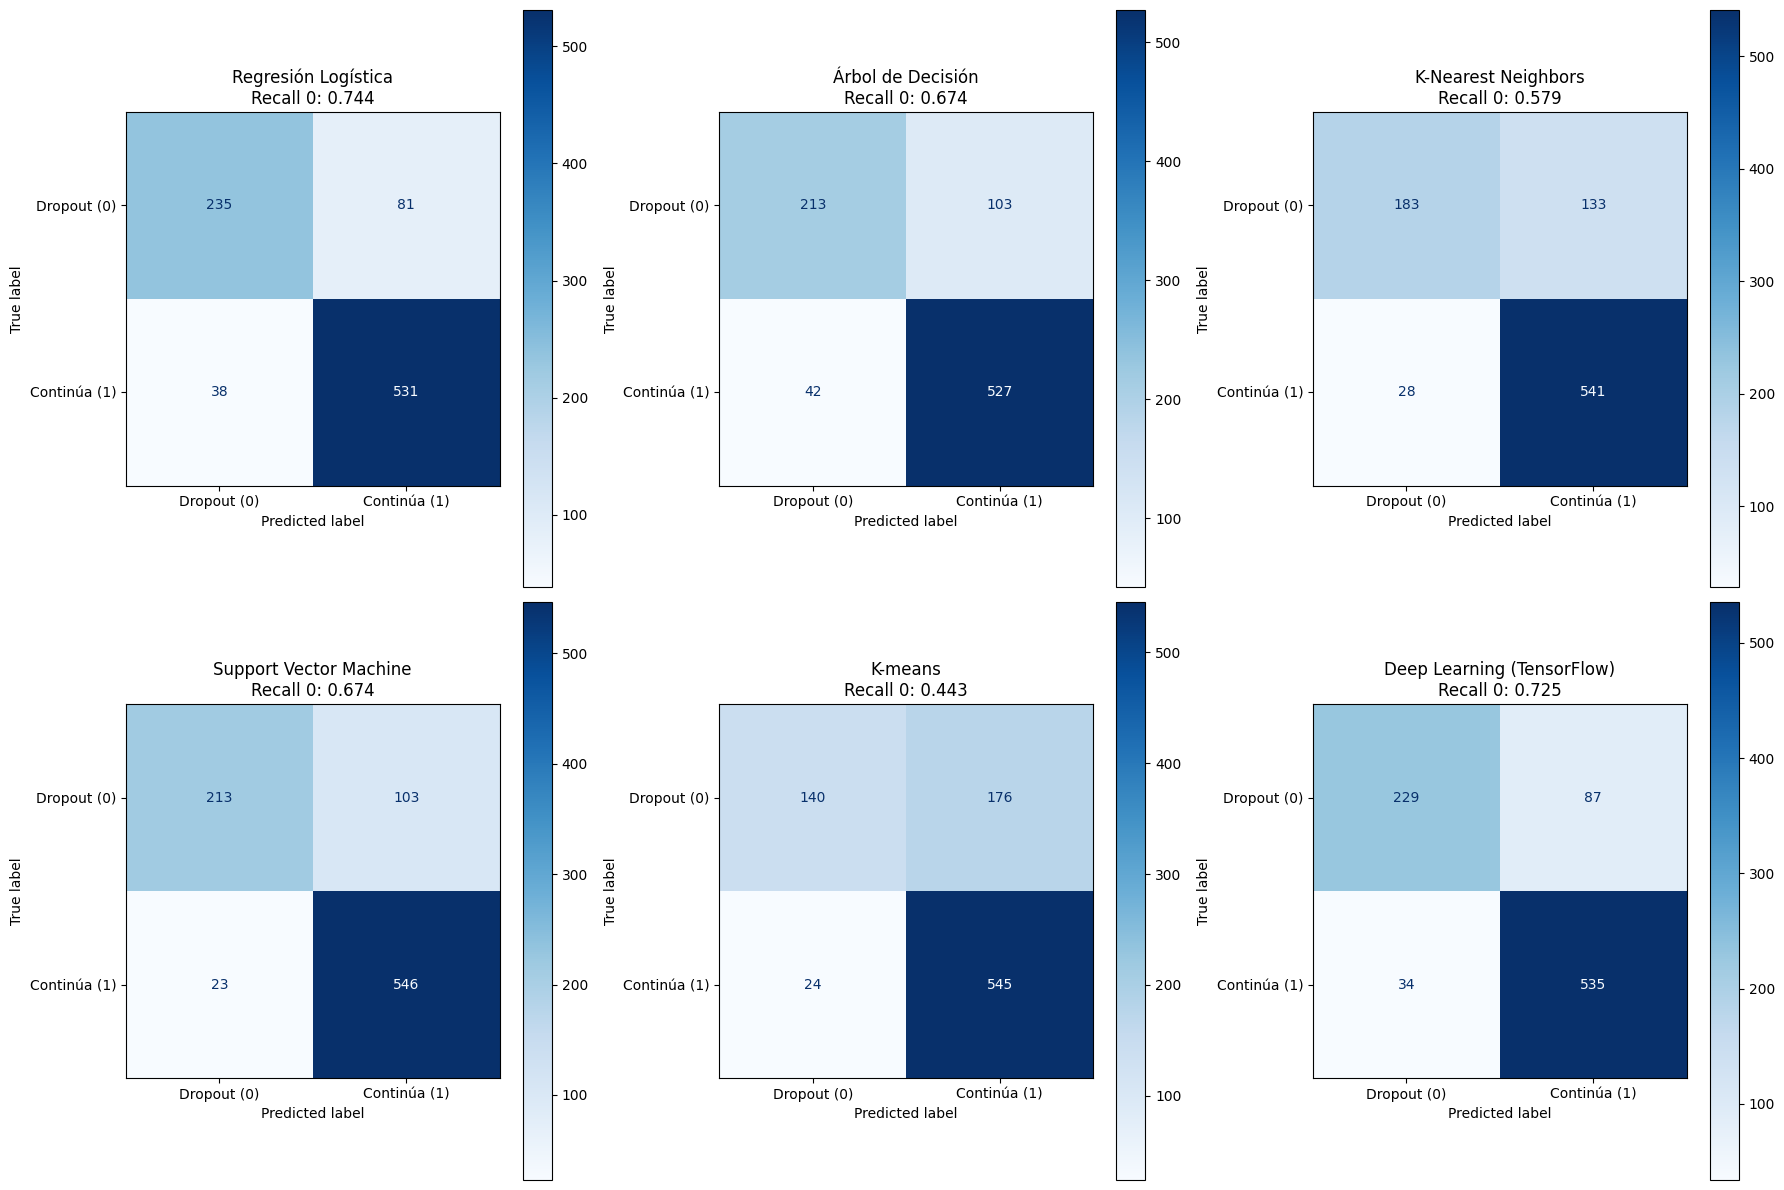


📈 CURVAS ROC COMPARATIVAS:
----------------------------------------


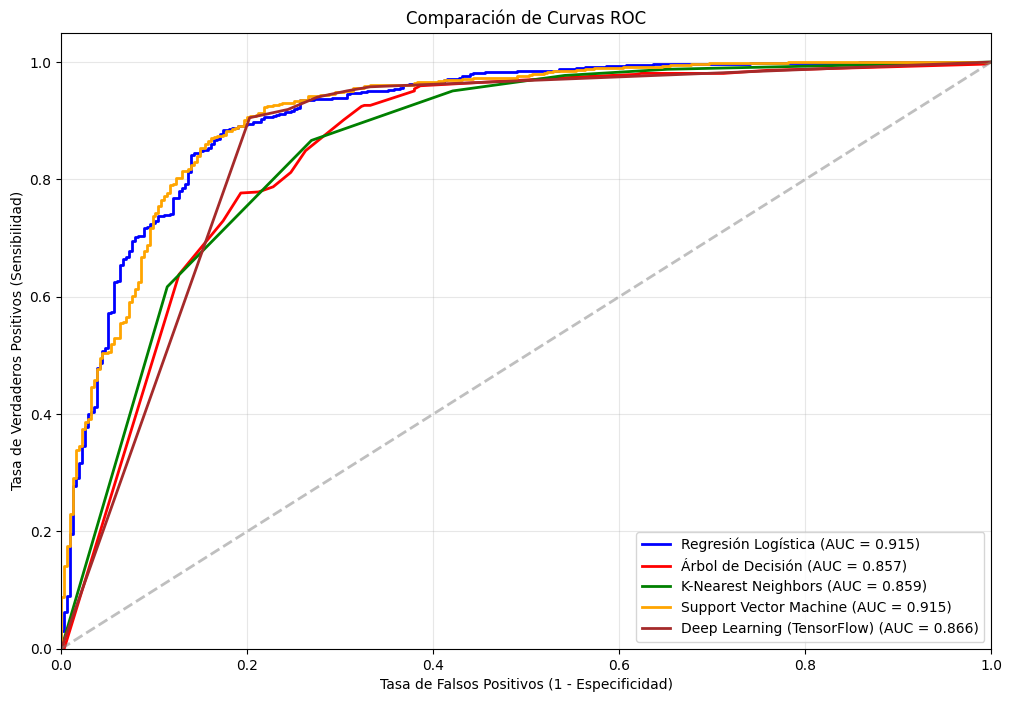


🏆 RANKING DE MODELOS POR MÉTRICAS:
--------------------------------------------------

🥇 Por F1-Score:
   🥇 Regresión Logística: 0.8992
   🥈 Deep Learning (TensorFlow): 0.8984
   🥉 Support Vector Machine: 0.8966

🥇 Por Accuracy:
   🥇 Regresión Logística: 0.8655
   🥈 Deep Learning (TensorFlow): 0.8633
   🥉 Support Vector Machine: 0.8576

🥇 Por Recall 0:
   🥇 Regresión Logística: 0.7437
   🥈 Deep Learning (TensorFlow): 0.7247
   🥉 Árbol de Decisión: 0.6741

🥇 Por Recall 1:
   🥇 Support Vector Machine: 0.9596
   🥈 K-means: 0.9578
   🥉 K-Nearest Neighbors: 0.9508

🎯 ANÁLISIS ESPECÍFICO PARA DETECCIÓN DE DESERCIÓN:
------------------------------------------------------------

📊 GRÁFICO COMPARATIVO VISUAL:
----------------------------------------


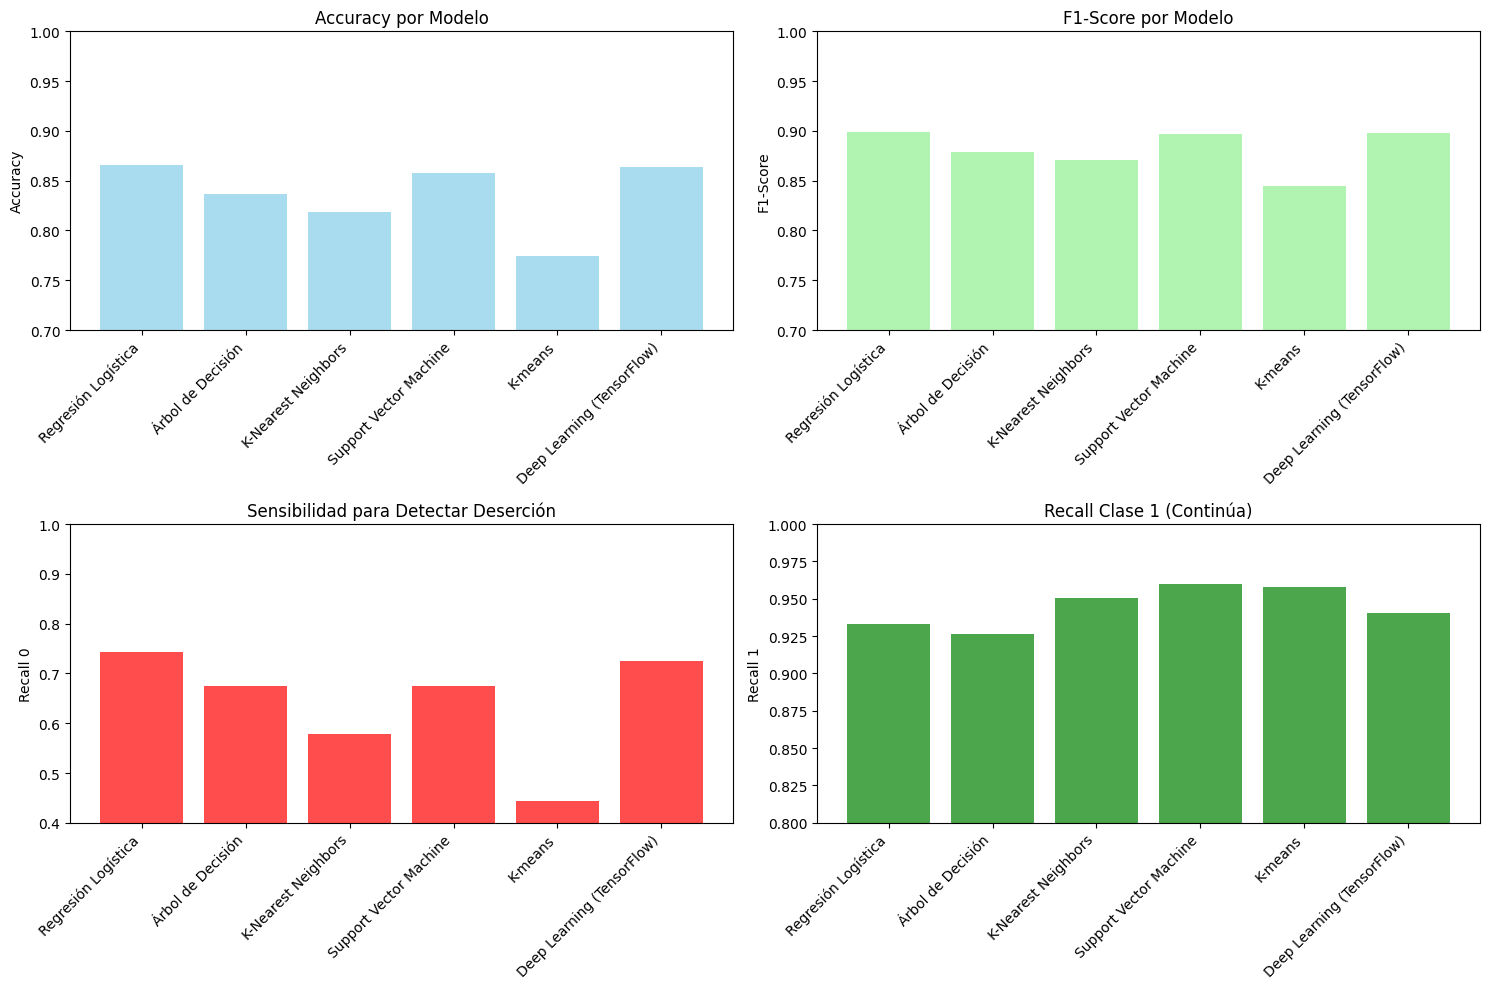


✅ COMPARACIÓN EXHAUSTIVA COMPLETADA!
   Se han evaluado todos los modelos con métricas completas
   Se han generado matrices de confusión y curvas ROC
   Se ha determinado el mejor modelo según diferentes criterios

🔍 ANÁLISIS DE CLUSTERING CON PCA + K-MEANS


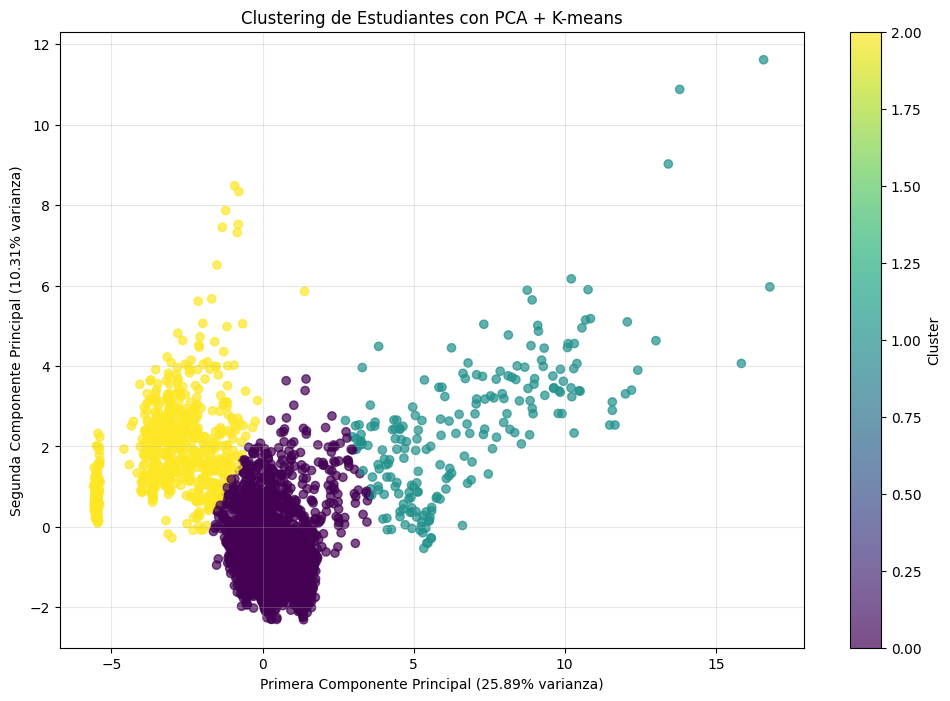

Varianza explicada por las 2 primeras componentes: 36.20%
✅ Análisis de clustering completado!


In [27]:
# --- COMPARACIÓN EXHAUSTIVA DE TODOS LOS MODELOS ---
print("\n" + "="*80)
print("🏆 COMPARACIÓN EXHAUSTIVA - MATRICES, ROC Y MÉTRICAS")
print("="*80)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Diccionario con todos los modelos entrenados y sus predicciones

modelos_completos = {
    'Regresión Logística': {
        'modelo': pipeline_lr,
        'predicciones': preds_lr,
        'probabilidades': pipeline_lr.predict_proba(X_test)[:, 1]
    },
    'Árbol de Decisión': {
        'modelo': pipeline_dt,
        'predicciones': preds_dt,
        'probabilidades': pipeline_dt.predict_proba(X_test)[:, 1]
    },
    'K-Nearest Neighbors': {
        'modelo': pipeline_knn,
        'predicciones': preds_knn,
        'probabilidades': pipeline_knn.predict_proba(X_test)[:, 1]
    },
    'Support Vector Machine': {
        'modelo': pipeline_svm,
        'predicciones': preds_svm,
        'probabilidades': pipeline_svm.predict_proba(X_test)[:, 1]
    },
    'K-means': {
        'modelo': kmeans,
        'predicciones': kmeans_predictions,
        'probabilidades': None  # K-means no tiene probabilidades
    },
    'Deep Learning (TensorFlow)': {
        'modelo': model,
        'predicciones': y_pred_deep,  # Última ejecución
        'probabilidades': y_pred_proba.flatten() # Promedio de probabilidades
    }
}

# 1. CALCULAR MÉTRICAS PARA TODOS LOS MODELOS
print("\n📊 MÉTRICAS DETALLADAS POR MODELO:")
print("-" * 80)

resultados_metricas = []
for nombre, datos in modelos_completos.items():
    y_pred = datos['predicciones']
    
    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Métricas específicas para deserción - CORREGIDO
    sensibilidad_desercion = tn / (tn + fp) if (tn + fp) > 0 else 0  # Detectar desertores
    especificidad_continuidad = tp / (tp + fp) if (tp + fp) > 0 else 0  # Detectar continuidad
    tasa_falsos_positivos = fp / (fp + tn) if (fp + tn) > 0 else 0
    tasa_falsos_negativos = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    # AUC (solo para modelos con probabilidades)
    auc_score = None
    if datos['probabilidades'] is not None:
        auc_score = roc_auc_score(y_test, datos['probabilidades'])
    
    resultados_metricas.append({
        'Modelo': nombre,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall 1': round(recall, 4),
        'Recall 0': round(sensibilidad_desercion, 4),
        'F1-Score': round(f1, 4),
        'AUC': round(auc_score, 4) if auc_score else 'N/A',
       
    })
    
    print(f"\n🔍 {nombre}:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall 1: {recall:.4f}")
    print(f"   Recall 0: {sensibilidad_desercion:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    if auc_score:
        print(f"   AUC: {auc_score:.4f}")

# 2. CREAR DATAFRAME COMPARATIVO
df_comparacion = pd.DataFrame(resultados_metricas)
print("\n📋 TABLA COMPARATIVA COMPLETA:")
print("-" * 100)
print(df_comparacion.to_string(index=False))

# 3. MATRICES DE CONFUSIÓN
print("\n🔍 MATRICES DE CONFUSIÓN POR MODELO:")
print("-" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (nombre, datos) in enumerate(modelos_completos.items()):
    cm = confusion_matrix(y_test, datos['predicciones'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dropout (0)", "Continúa (1)"])
    disp.plot(ax=axes[i], cmap='Blues')
    # Obtener la sensibilidad específica de este modelo
    sensibilidad_especifica = resultados_metricas[i]['Recall 0']
    axes[i].set_title(f'{nombre}\nRecall 0: {sensibilidad_especifica:.3f}')

plt.tight_layout()
plt.show()

# 4. CURVAS ROC (solo para modelos con probabilidades)
print("\n📈 CURVAS ROC COMPARATIVAS:")
print("-" * 40)

plt.figure(figsize=(12, 8))
colores = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for i, (nombre, datos) in enumerate(modelos_completos.items()):
    if datos['probabilidades'] is not None:
        fpr, tpr, _ = roc_curve(y_test, datos['probabilidades'])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colores[i], lw=2, 
                label=f'{nombre} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 5. RANKING DE MODELOS
print("\n🏆 RANKING DE MODELOS POR MÉTRICAS:")
print("-" * 50)

# Ordenar por diferentes métricas
rankings = {
    'F1-Score': df_comparacion.sort_values('F1-Score', ascending=False),
    'Accuracy': df_comparacion.sort_values('Accuracy', ascending=False),
    'Recall 0': df_comparacion.sort_values('Recall 0', ascending=False),
    'Recall 1': df_comparacion.sort_values('Recall 1', ascending=False),


}

for titulo, ranking in rankings.items():
    print(f"\n🥇 Por {titulo}:")
    for i, (_, row) in enumerate(ranking.head(3).iterrows()):
        pos = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
        if titulo == 'Recall 1':
            print(f"   {pos} {row['Modelo']}: {row['Recall 1']}")
        else:
            print(f"   {pos} {row['Modelo']}: {row[titulo]}")

# 6. ANÁLISIS ESPECÍFICO PARA DESERCIÓN
print("\n🎯 ANÁLISIS ESPECÍFICO PARA DETECCIÓN DE DESERCIÓN:")
print("-" * 60)

# 7. GRÁFICO DE COMPARACIÓN VISUAL
print("\n📊 GRÁFICO COMPARATIVO VISUAL:")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0,0].bar(range(len(df_comparacion)), df_comparacion['Accuracy'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Accuracy por Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xticks(range(len(df_comparacion)))
axes[0,0].set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
axes[0,0].set_ylim(0.7, 1.0)

# F1-Score
axes[0,1].bar(range(len(df_comparacion)), df_comparacion['F1-Score'], color='lightgreen', alpha=0.7)
axes[0,1].set_title('F1-Score por Modelo')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].set_xticks(range(len(df_comparacion)))
axes[0,1].set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
axes[0,1].set_ylim(0.7, 1.0)

# Sensibilidad Deserción
axes[1,0].bar(range(len(df_comparacion)), df_comparacion['Recall 0'], color='red', alpha=0.7)
axes[1,0].set_title('Sensibilidad para Detectar Deserción')
axes[1,0].set_ylabel('Recall 0')
axes[1,0].set_xticks(range(len(df_comparacion)))
axes[1,0].set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
axes[1,0].set_ylim(0.4, 1.0)  # En lugar de 0.5, 1.0

# Recall 1 (Continúa)
axes[1,1].bar(range(len(df_comparacion)), df_comparacion['Recall 1'], color='green', alpha=0.7)
axes[1,1].set_title('Recall Clase 1 (Continúa)')
axes[1,1].set_ylabel('Recall 1')
axes[1,1].set_xticks(range(len(df_comparacion)))
axes[1,1].set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
axes[1,1].set_ylim(0.8, 1.0)



plt.tight_layout()
plt.show()

print("\n✅ COMPARACIÓN EXHAUSTIVA COMPLETADA!")
print("   Se han evaluado todos los modelos con métricas completas")
print("   Se han generado matrices de confusión y curvas ROC")
print("   Se ha determinado el mejor modelo según diferentes criterios")
# --- ANÁLISIS ADICIONAL: PCA + K-MEANS CLUSTERING ---
print("\n" + "="*60)
print("🔍 ANÁLISIS DE CLUSTERING CON PCA + K-MEANS")
print("="*60)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Aplicar PCA para reducir a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_tf)

# Aplicar K-means
kmeans_clustering = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_clustering.fit_predict(X_pca)

# Crear el scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel(f'Primera Componente Principal ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'Segunda Componente Principal ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('Clustering de Estudiantes con PCA + K-means')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Varianza explicada por las 2 primeras componentes: {pca.explained_variance_ratio_.sum():.2%}")
print("✅ Análisis de clustering completado!")